<a href="https://colab.research.google.com/github/remytr/Black-Scholes-Model/blob/main/Black_Scholes_Option_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Option Pricing Model using Black-Scholes Model

In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
plt.style.use('ggplot')

In [3]:
# Define the variables

S = 45 # Underlying price of the stock. $42
K = 40 # Strike price, at the time the option expires you have the option to purchase the underlying stock for $40.
T = 3 # Time to expiration. Expires 6 months in the future
r = 0.1 # Risk-free rate.
vol = 0.5 # Volatility (sigma). Essentially the standard deviation of the stock's prices

In [4]:
# Calculate d1

d1 = (math.log(S/K) + (r + (vol**2)/2)*T)/(vol*math.sqrt(T))

In [5]:
# Calculate d2

d2 = d1 - vol*math.sqrt(T)

In [6]:
# Calculate Call Option Price
# N(d1) is a probablity. Finds the probablity that the underlying stock price will be higher than strike price K at the time the call expires.
# N is a cumulative distribution function.

C = S*norm.cdf(d1) - K*math.exp(-r*T)*norm.cdf(d2)

In [7]:
# Calculate Put Option Price
# The reverse of the call option price. If I own the put option I am better off if the underlying stock price decreases.
# Inverse relationship between call and put option on the same stock.
# With the cdf functions we are assuming normal distributions. So mean of 0 and std of 1.

P = K*math.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

In [8]:
print("The value of d1 is ", round(d1,4 ))
print("The value of d2 is ", round(d2,4 ))
print("The value of the call option is: $", round(C,2 ))
print("The value of the put option is: $", round(P,2 ))

The value of d1 is  0.9154
The value of d2 is  0.0494
The value of the call option is: $ 21.5
The value of the put option is: $ 6.13


Volatility has a positive correlation for call and put option price.

Putting all of it into a function so I can call it easily

In [9]:
def black_scholes(S,K,T,r,vol):

  d1 = (math.log(S/K) + (r + (vol**2)/2)*T)/(vol*math.sqrt(T))
  d2 = d1 - vol*math.sqrt(T)

  C = S*norm.cdf(d1) - K*math.exp(-r*T)*norm.cdf(d2)
  P = K*math.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

  print("The value of the call option is: $", round(C,2 ))
  print("The value of the put option is: $", round(P,2))
  return C,P

In [10]:
black_scholes(100,40,3,0.1,0.5)

The value of the call option is: $ 71.97
The value of the put option is: $ 1.6


(np.float64(71.96930464289777), np.float64(1.6020334701664827))

# Sensitivty Analysis

In [11]:
# Goal is to examine how the theoretical option price changes when you vary each of the input parameters of the model.
# Vary one parameter and keep the others constant. Then plot the results.

S = [20,40,60,80,100]
K = [30,50,70,90,110]
T = [0.2,0.4,0.6,0.8,1.0]
r = [0.05,0.10,0.15,0.20,0.25]
vol = [0.1,0.2,0.3,0.4,0.5]

In [12]:
# Write loops that will loop over each index of each parameter and plot the call and put option prices.
# The x axis will have the parameter I am varying and on the y axis plot the call and put option prices.

results = {}
param_names = ['S','K','T','r','vol']
param_lists = [S,K,T,r,vol]

for param_name, param_list in zip(param_names,param_lists):
  call_prices = []
  put_prices = []

  default_params = {'S':50, 'K':40, 'T':1, 'r':0.05, 'vol':0.2}

  for i in param_list:
    current_params = default_params.copy()
    current_params[param_name] = i

    C,P = black_scholes(**current_params)
    call_prices.append(C)
    put_prices.append(P)

  results[param_name] = {'call': call_prices, 'put': put_prices, 'x_values': param_list}

The value of the call option is: $ 0.0
The value of the put option is: $ 18.05
The value of the call option is: $ 4.18
The value of the put option is: $ 2.23
The value of the call option is: $ 21.99
The value of the put option is: $ 0.04
The value of the call option is: $ 41.95
The value of the put option is: $ 0.0
The value of the call option is: $ 61.95
The value of the put option is: $ 0.0
The value of the call option is: $ 21.47
The value of the put option is: $ 0.01
The value of the call option is: $ 5.23
The value of the put option is: $ 2.79
The value of the call option is: $ 0.39
The value of the put option is: $ 16.98
The value of the call option is: $ 0.01
The value of the put option is: $ 35.62
The value of the call option is: $ 0.0
The value of the put option is: $ 54.64
The value of the call option is: $ 10.4
The value of the put option is: $ 0.01
The value of the call option is: $ 10.85
The value of the put option is: $ 0.06
The value of the call option is: $ 11.33
The va

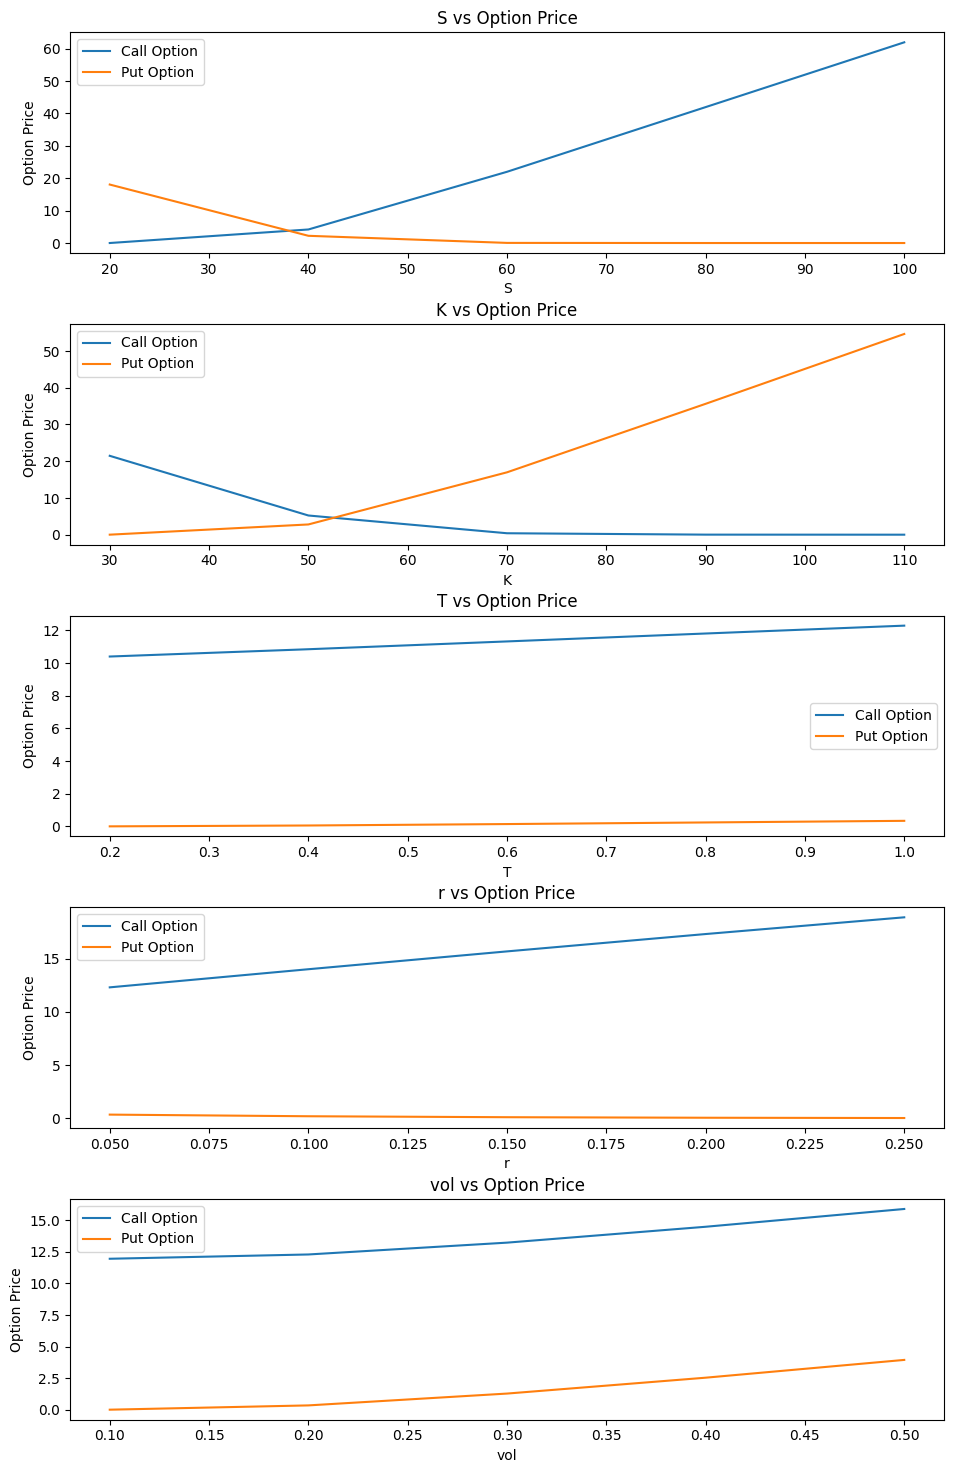

In [13]:
# Plot the results

fig, axes = plt.subplots(len(param_names), 1, figsize=(10,15))
fig.tight_layout(pad=3.0)

for i, param_name in enumerate(param_names):
  ax = axes[i]
  ax.plot(results[param_name]['x_values'], results[param_name]['call'], label='Call Option')
  ax.plot(results[param_name]['x_values'], results[param_name]['put'], label='Put Option')
  ax.set_xlabel(param_name)
  ax.set_ylabel('Option Price')
  ax.set_title(f'{param_name} vs Option Price')
  ax.legend()
plt.show()

# Finite Difference Method: Explicit Method to evaluate a European Call Option

In [14]:
# Define the parameters of the problem

r = 0.2
sigma = 0.25
Nt = 1600 # Number of time steps
Ns = 160 # Number of asset price steps
Smax = 20 # Max asset price considered
Smin = 0 # Min asset price considered
T = 1 # Expiration of contract
E = 10 # Exercise price of the underlying asset

In [15]:
dt = (T/Nt) # Time step
ds = (Smax-Smin)/Ns # price step

V = np.zeros((Ns+1,Nt+1)) # Initialize the value function

# Discretization of asset (S) and tau (tau = T-t) variables
S = Smin + np.arange(Ns+1)*ds
tau = np.arange(Nt+1)*dt

# Initial conditions prescribed by the European Call payoff at expiry: V(S,tau = 0) = max(S-E,0)
V[:,0] = np.maximum(S-E,0)

# Boundary conditions prescribed by the European Call
V[0,:] = 0
V[-1,:] = Smax - (E * np.exp(-r*tau)) # discount of the exercise price

# Implmenting the explict algorithm
for j in range(Nt):
  for i in range(1,Ns):
    V[i,j] = 0.5 * dt * (sigma**2 * i**2 - (r*i)) * V[i-1,j+1] + (1-dt*(sigma**2 * i**2 +r)) * V[i,j+1] + 0.5*dt*(sigma**2 * i**2 + (r*i)) * V[i+1,j+1]




In [16]:
# The value of the option at t=0 (tau=T) for the initial asset price (e.g., S=10) would be V[index_of_10, Nt]
initial_asset_price = 20
index_of_initial_price = int((initial_asset_price - Smin) / ds)
option_price_at_t0 = V[index_of_initial_price, Nt]
print(f"European call option price at t=0 for S={initial_asset_price}: {option_price_at_t0}")


European call option price at t=0 for S=20: 11.812692469220181


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (161, 1601) and arg 1 with shape (1601, 161).

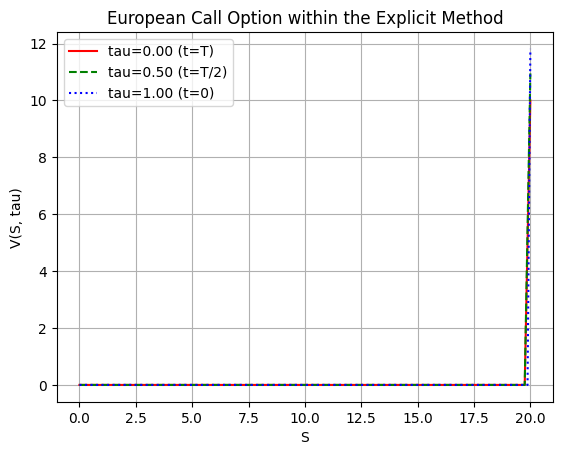

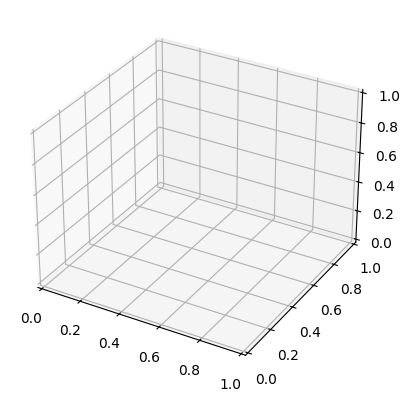

In [17]:
  Nt = V.shape[1] - 1

  # Figure 1: Option value vs. asset price at three time points
  plt.figure(1)
  plt.plot(S, V[:, 0], 'r-', label=f'tau={tau[0]:.2f} (t=T)')
  plt.plot(S, V[:, Nt // 2], 'g--', label=f'tau={tau[Nt // 2]:.2f} (t=T/2)')
  plt.plot(S, V[:, Nt], 'b:', label=f'tau={tau[Nt]:.2f} (t=0)')
  plt.xlabel('S')
  plt.ylabel('V(S, tau)')
  plt.title('European Call Option within the Explicit Method')
  plt.legend()
  plt.grid(True)

  # Figure 2: 3D plot of the option value
  fig = plt.figure(2)
  ax = fig.add_subplot(111, projection='3d')
  S_mesh, tau_mesh = np.meshgrid(S, tau)
  ax.plot_surface(tau_mesh.T, S_mesh, V, cmap='viridis') # Transpose V to match meshgrid
  ax.set_xlabel('tau')
  ax.set_ylabel('S')
  ax.set_zlabel('V(S, tau)')
  ax.set_title('3D Plot of the Value of the Option, V(S, tau)')

  plt.show()

# Explicit Finite Difference with Black-Scholes

In [21]:
NoTimeSteps = 100
NoAssetSteps = 50
Expiry = 1.0
TimeStep = Expiry / NoTimeSteps

In [22]:
def option_value_3d(vol, int_rate, p_type, strike, expiration, NAS):
    # NAS is number of asset steps
    S = np.zeros(NAS + 1)  # Asset array
    dS = 3 * strike / NAS  # 'Infinity' is twice the strike
    dt = 0.9 / vol ** 2 / NAS ** 2  # For stability
    NTS = int(expiration / dt) + 1  # Number of time steps
    dt = expiration / NTS  # To ensure that expiration is an integer number of time steps away
    V = np.zeros((NAS + 1, NTS + 1))  # Option value array
    q = 1
    if p_type == "put":
        q = -1

    for i in range(NAS + 1):
        #ds is asset step e.g. ticks
        S[i] = i * dS

        # payoff function
        # sets values at time t_0 based on the set up asset prices
        V[i, 0] = max(q * (S[i] - strike), 0)

    for k in range(1, NTS + 1):  # Time loop
        ## And now ta dam ... Nobel prize winning diff equation ;)
        for i in range(1, NAS):  # Asset loop
            delta = (V[i + 1, k - 1] - V[i - 1, k - 1]) / 2 / dS  # Central difference
            gamma = (V[i + 1, k - 1] - 2 * V[i, k - 1] + V[i - 1, k - 1]) / dS / dS  # Central difference
            theta = -0.5 * vol ** 2 * S[i] ** 2 * gamma - int_rate * S[i] * delta + int_rate * V[i, k - 1]  # Black-Scholes
            V[i, k] = V[i, k - 1] - dt * theta

        V[0, k] = V[0, k - 1] * (1 - int_rate * dt)  # Boundary condition at S=0
        V[NAS, k] = 2 * V[NAS - 1, k] - V[NAS - 2, k]  # Boundary condition at S=infinity

    asset_range = np.arange(0, NAS + 1) * dS  # Asset price range
    time_steps = np.arange(0, NTS + 1) * dt
    rounded_time_steps = np.round(time_steps, decimals=3)
    df = pd.DataFrame(V, index=asset_range, columns=rounded_time_steps).round(3)

    return df  # Output array

In [34]:
sigma = 0.2
r = 0.05
K = 100
T = 1
NAS = 20 # number of asset steps

option_df = option_value_3d(sigma, r, "call", K, T, NAS)

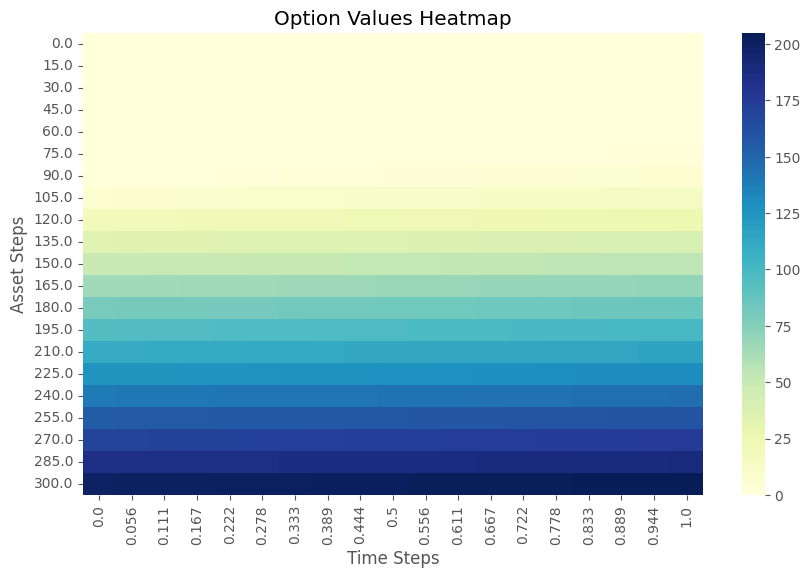

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(option_df, cmap='YlGnBu', fmt=".3f")
plt.title('Option Values Heatmap')
plt.xlabel('Time Steps')
plt.ylabel('Asset Steps')
plt.show()

#

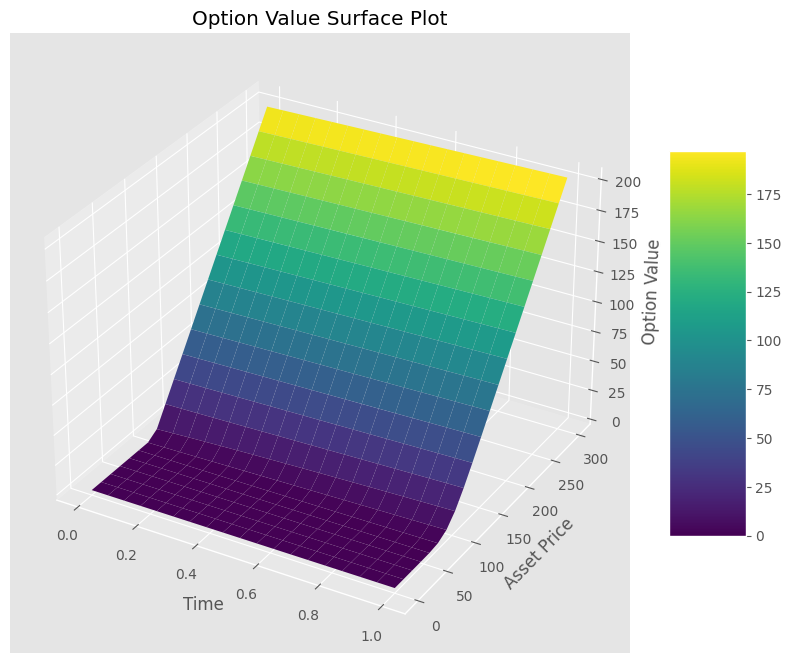

In [36]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(option_df.columns, option_df.index)
Z = option_df.values

surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Time')
ax.set_ylabel('Asset Price')
ax.set_zlabel('Option Value')
ax.set_title('Option Value Surface Plot')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()